In [981]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

# Data cleaning

#### Loading data

In [982]:
file3_df= pd.read_csv("data/file3.csv")
file3_df

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


#### Renaming columns

In [983]:
def rename_columns(file3_df):
    file3_df.rename(columns={'State':'ST', 'Gender':'GENDER'}, inplace=True)
    return file3_df

In [984]:
rename_columns(file3_df)

,Customer,ST,Customer Lifetime Value,Education,GENDER,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


#### Loading data

In [985]:
def merge_data():
    file1 = pd.read_csv('Data/file1.csv')
    file2 = pd.read_csv('Data/file2.csv')
    file3 = file3_df
    return pd.concat([file1,file2,file3], axis=0)

In [986]:
insurance_df=merge_data()

In [987]:
insurance_df

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


#### Make the column names lower case

In [988]:
def lower_case_column_names(insurance_df):
    insurance_df.columns=[i.lower() for i in insurance_df.columns]  
    return insurance_df

In [989]:
lower_case_column_names(insurance_df)

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


#### Renaming columns

In [990]:
def rename_state(insurance_df):
    insurance_df.rename(columns={'st':'state'}, inplace=True)
    return insurance_df

In [991]:
rename_state(insurance_df)

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


#### Deleting columns

In [992]:
def drop_columns(insurance_df) :
    insurance_df.drop(columns=["customer"], inplace=True)
    return insurance_df

In [993]:
drop_columns(insurance_df)

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


#### Rearanging columns

In [994]:
list(insurance_df.columns)

['state',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

In [995]:
insurance_df = insurance_df[[
 'state',
 'gender',
 'education',
 'income',
'vehicle class',
'policy type',
 'monthly premium auto',
 'number of open complaints',
 'total claim amount',
'customer lifetime value',]]

insurance_df.head()

,state,gender,education,income,vehicle class,policy type,monthly premium auto,number of open complaints,total claim amount,customer lifetime value
0,Washington,NaN,Master,0.0,Four-Door Car,Personal Auto,1000.0,1/0/00,2.704934,NaN
1,Arizona,F,Bachelor,0.0,Four-Door Car,Personal Auto,94.0,1/0/00,1131.464935,697953.59%
2,Nevada,F,Bachelor,48767.0,Two-Door Car,Personal Auto,108.0,1/0/00,566.472247,1288743.17%
3,California,M,Bachelor,0.0,SUV,Corporate Auto,106.0,1/0/00,529.881344,764586.18%
4,Washington,M,High School or Below,36357.0,Four-Door Car,Personal Auto,68.0,1/0/00,17.269323,536307.65%


#### Correcting data types

In [996]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   income                     9137 non-null   float64
 4   vehicle class              9137 non-null   object 
 5   policy type                9137 non-null   object 
 6   monthly premium auto       9137 non-null   float64
 7   number of open complaints  9137 non-null   object 
 8   total claim amount         9137 non-null   float64
 9   customer lifetime value    9130 non-null   object 
dtypes: float64(3), object(7)
memory usage: 1.0+ MB


In [997]:
insurance_df["number of open complaints"].unique().tolist()

['1/0/00',
 '1/2/00',
 '1/1/00',
 '1/3/00',
 '1/5/00',
 '1/4/00',
 nan,
 0,
 2,
 3,
 1,
 5,
 4]

In [998]:
insurance_df['number of open complaints'] = pd.to_numeric(insurance_df['number of open complaints'], errors='coerce')

In [999]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   income                     9137 non-null   float64
 4   vehicle class              9137 non-null   object 
 5   policy type                9137 non-null   object 
 6   monthly premium auto       9137 non-null   float64
 7   number of open complaints  7070 non-null   float64
 8   total claim amount         9137 non-null   float64
 9   customer lifetime value    9130 non-null   object 
dtypes: float64(4), object(6)
memory usage: 1.0+ MB


In [1000]:
insurance_df["customer lifetime value"].unique().tolist()

[nan,
 '697953.59%',
 '1288743.17%',
 '764586.18%',
 '536307.65%',
 '825629.78%',
 '538089.86%',
 '721610.03%',
 '2412750.40%',
 '738817.81%',
 '473899.20%',
 '819719.71%',
 '879879.70%',
 '881901.89%',
 '538443.17%',
 '746313.94%',
 '256686.78%',
 '394524.16%',
 '571033.31%',
 '816261.71%',
 '287205.13%',
 '617710.93%',
 '245019.10%',
 '239210.79%',
 '580206.60%',
 '394637.21%',
 '916206.32%',
 '1290256.01%',
 '323536.05%',
 '245458.35%',
 '1897545.61%',
 '471532.13%',
 '473787.17%',
 '493291.63%',
 '574422.97%',
 '1389173.57%',
 '738097.67%',
 '309003.41%',
 '252163.31%',
 '265206.18%',
 '277104.50%',
 '393900.64%',
 '1223187.97%',
 '495165.61%',
 '1281910.29%',
 '446851.05%',
 '551434.40%',
 '334387.53%',
 '229447.89%',
 '3670742.64%',
 '3347334.95%',
 '798343.17%',
 '487938.48%',
 '429399.73%',
 '716439.55%',
 '761951.58%',
 '395800.28%',
 '449949.33%',
 '405956.74%',
 '445811.34%',
 '811033.31%',
 '333976.49%',
 '2426101.78%',
 '661397.37%',
 '293069.35%',
 '867219.43%',
 '1163866

In [1001]:
insurance_df['customer lifetime value'] = pd.to_numeric(insurance_df['customer lifetime value'], errors='coerce')

In [1002]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   income                     9137 non-null   float64
 4   vehicle class              9137 non-null   object 
 5   policy type                9137 non-null   object 
 6   monthly premium auto       9137 non-null   float64
 7   number of open complaints  7070 non-null   float64
 8   total claim amount         9137 non-null   float64
 9   customer lifetime value    7070 non-null   float64
dtypes: float64(5), object(5)
memory usage: 1.0+ MB


#### Cleaning column gender

In [1003]:
insurance_df["gender"].unique().tolist()

[nan, 'F', 'M', 'Femal', 'Male', 'female']

In [1005]:
insurance_df['gender'].replace({'Male': 'M', 'Femal': 'F', 'female': 'F'}, inplace=True)

In [1006]:
insurance_df["gender"].unique().tolist()

[nan, 'F', 'M']

#### Cleaning column state

In [1007]:
insurance_df["state"].unique().tolist()

['Washington',
 'Arizona',
 'Nevada',
 'California',
 'Oregon',
 'Cali',
 'AZ',
 'WA',
 nan]

In [1008]:
insurance_df['state'].replace({'WA': 'Washington', 'Cali': 'California', 'AZ': 'Arizona'}, inplace=True)

In [1009]:
insurance_df["state"].unique().tolist()

['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan]

#### Removing duplicates

In [1010]:
insurance_df.shape

(12074, 10)

In [1011]:
insurance_df.drop_duplicates()

,state,gender,education,income,vehicle class,policy type,monthly premium auto,number of open complaints,total claim amount,customer lifetime value
0,Washington,NaN,Master,0.0,Four-Door Car,Personal Auto,1000.0,NaN,2.704934,NaN
1,Arizona,F,Bachelor,0.0,Four-Door Car,Personal Auto,94.0,NaN,1131.464935,NaN
2,Nevada,F,Bachelor,48767.0,Two-Door Car,Personal Auto,108.0,NaN,566.472247,NaN
3,California,M,Bachelor,0.0,SUV,Corporate Auto,106.0,NaN,529.881344,NaN
4,Washington,M,High School or Below,36357.0,Four-Door Car,Personal Auto,68.0,NaN,17.269323,NaN
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,71941.0,Four-Door Car,Personal Auto,73.0,0.0,198.234764,23405.987980
7066,California,F,College,21604.0,Four-Door Car,Corporate Auto,79.0,0.0,379.200000,3096.511217
7067,California,M,Bachelor,0.0,Four-Door Car,Corporate Auto,85.0,3.0,790.784983,8163.890428
7068,California,M,College,21941.0,Four-Door Car,Personal Auto,96.0,0.0,691.200000,7524.442436


#### Replacing null values

In [1012]:
mean_number_of_open_complaints = np.mean(insurance_df['number of open complaints'])
insurance_df['number of open complaints'] = insurance_df['number of open complaints'].fillna(mean_number_of_open_complaints)

In [1013]:
mean_customer_lifetime_value = np.mean(insurance_df['customer lifetime value'])
insurance_df['customer lifetime value'] = insurance_df['customer lifetime value'].fillna(mean_customer_lifetime_value)

In [1014]:
insurance_df

,state,gender,education,income,vehicle class,policy type,monthly premium auto,number of open complaints,total claim amount,customer lifetime value
0,Washington,NaN,Master,0.0,Four-Door Car,Personal Auto,1000.0,0.3843,2.704934,8028.803803
1,Arizona,F,Bachelor,0.0,Four-Door Car,Personal Auto,94.0,0.3843,1131.464935,8028.803803
2,Nevada,F,Bachelor,48767.0,Two-Door Car,Personal Auto,108.0,0.3843,566.472247,8028.803803
3,California,M,Bachelor,0.0,SUV,Corporate Auto,106.0,0.3843,529.881344,8028.803803
4,Washington,M,High School or Below,36357.0,Four-Door Car,Personal Auto,68.0,0.3843,17.269323,8028.803803
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,71941.0,Four-Door Car,Personal Auto,73.0,0.0000,198.234764,23405.987980
7066,California,F,College,21604.0,Four-Door Car,Corporate Auto,79.0,0.0000,379.200000,3096.511217
7067,California,M,Bachelor,0.0,Four-Door Car,Corporate Auto,85.0,3.0000,790.784983,8163.890428
7068,California,M,College,21941.0,Four-Door Car,Personal Auto,96.0,0.0000,691.200000,7524.442436


#### Creating buckets

In [1015]:
insurance_df['state'].replace({'California': 'West Region', 'Oregon': 'North West', 'Washington' : 'East', 'Arizona' : 'Central', 'Nevada' : 'Central'}, inplace=True)

In [1016]:
insurance_df

,state,gender,education,income,vehicle class,policy type,monthly premium auto,number of open complaints,total claim amount,customer lifetime value
0,East,NaN,Master,0.0,Four-Door Car,Personal Auto,1000.0,0.3843,2.704934,8028.803803
1,Central,F,Bachelor,0.0,Four-Door Car,Personal Auto,94.0,0.3843,1131.464935,8028.803803
2,Central,F,Bachelor,48767.0,Two-Door Car,Personal Auto,108.0,0.3843,566.472247,8028.803803
3,West Region,M,Bachelor,0.0,SUV,Corporate Auto,106.0,0.3843,529.881344,8028.803803
4,East,M,High School or Below,36357.0,Four-Door Car,Personal Auto,68.0,0.3843,17.269323,8028.803803
...,...,...,...,...,...,...,...,...,...,...
7065,West Region,M,Bachelor,71941.0,Four-Door Car,Personal Auto,73.0,0.0000,198.234764,23405.987980
7066,West Region,F,College,21604.0,Four-Door Car,Corporate Auto,79.0,0.0000,379.200000,3096.511217
7067,West Region,M,Bachelor,0.0,Four-Door Car,Corporate Auto,85.0,3.0000,790.784983,8163.890428
7068,West Region,M,College,21941.0,Four-Door Car,Personal Auto,96.0,0.0000,691.200000,7524.442436


#### Make the text data lower case

In [1017]:
categorical_columns = insurance_df.select_dtypes("object")
categorical_columns

,state,gender,education,vehicle class,policy type
0,East,NaN,Master,Four-Door Car,Personal Auto
1,Central,F,Bachelor,Four-Door Car,Personal Auto
2,Central,F,Bachelor,Two-Door Car,Personal Auto
3,West Region,M,Bachelor,SUV,Corporate Auto
4,East,M,High School or Below,Four-Door Car,Personal Auto
...,...,...,...,...,...
7065,West Region,M,Bachelor,Four-Door Car,Personal Auto
7066,West Region,F,College,Four-Door Car,Corporate Auto
7067,West Region,M,Bachelor,Four-Door Car,Corporate Auto
7068,West Region,M,College,Four-Door Car,Personal Auto


In [1018]:
insurance_df.apply(lambda item: item.astype(str).str.lower())

,state,gender,education,income,vehicle class,policy type,monthly premium auto,number of open complaints,total claim amount,customer lifetime value
0,east,nan,master,0.0,four-door car,personal auto,1000.0,0.3842998585572843,2.704934,8028.803803165787
1,central,f,bachelor,0.0,four-door car,personal auto,94.0,0.3842998585572843,1131.464935,8028.803803165787
2,central,f,bachelor,48767.0,two-door car,personal auto,108.0,0.3842998585572843,566.472247,8028.803803165787
3,west region,m,bachelor,0.0,suv,corporate auto,106.0,0.3842998585572843,529.881344,8028.803803165787
4,east,m,high school or below,36357.0,four-door car,personal auto,68.0,0.3842998585572843,17.269323,8028.803803165787
...,...,...,...,...,...,...,...,...,...,...
7065,west region,m,bachelor,71941.0,four-door car,personal auto,73.0,0.0,198.234764,23405.98798
7066,west region,f,college,21604.0,four-door car,corporate auto,79.0,0.0,379.2,3096.511217
7067,west region,m,bachelor,0.0,four-door car,corporate auto,85.0,3.0,790.784983,8163.890428
7068,west region,m,college,21941.0,four-door car,personal auto,96.0,0.0,691.2,7524.442436


#### Numerical Variables

In [1021]:
insurance_df._get_numeric_data()

,income,monthly premium auto,number of open complaints,total claim amount,customer lifetime value
0,0.0,1000.0,0.3843,2.704934,8028.803803
1,0.0,94.0,0.3843,1131.464935,8028.803803
2,48767.0,108.0,0.3843,566.472247,8028.803803
3,0.0,106.0,0.3843,529.881344,8028.803803
4,36357.0,68.0,0.3843,17.269323,8028.803803
...,...,...,...,...,...
7065,71941.0,73.0,0.0000,198.234764,23405.987980
7066,21604.0,79.0,0.0000,379.200000,3096.511217
7067,0.0,85.0,3.0000,790.784983,8163.890428
7068,21941.0,96.0,0.0000,691.200000,7524.442436


#### Categorical Variables

In [1022]:
categorical_columns= insurance_df.select_dtypes("object")
categorical_columns

,state,gender,education,vehicle class,policy type
0,east,NaN,master,four-door car,personal auto
1,central,f,bachelor,four-door car,personal auto
2,central,f,bachelor,two-door car,personal auto
3,west region,m,bachelor,suv,corporate auto
4,east,m,high school or below,four-door car,personal auto
...,...,...,...,...,...
7065,west region,m,bachelor,four-door car,personal auto
7066,west region,f,college,four-door car,corporate auto
7067,west region,m,bachelor,four-door car,corporate auto
7068,west region,m,college,four-door car,personal auto


#### Loading data

In [1023]:
mark_df= pd.read_csv("data/Data_Marketing_Customer_Analysis_Round2.csv")
mark_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


#### Deleting columns

In [1024]:
def drop_columns(mark_df) :
    mark_df.drop(columns=["Unnamed: 0"], inplace=True)
    return mark_df

drop_columns(mark_df)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


#### Make the column names lower case

In [1025]:
def lower_case_column_names(mark_df):
    mark_df.columns=[i.lower() for i in mark_df.columns]  
    return mark_df

In [1026]:
lower_case_column_names(mark_df)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


#### Extract the months in a separate column

In [1027]:
mark_df['month'] = pd.DatetimeIndex(mark_df['effective to date']).month

In [1028]:
mark_df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [1029]:
mark_df.month.unique()

array([2, 1])

In [1030]:
mark_df['month'] = mark_df['month'].astype("category")

In [1031]:
mark_df['month'].cat.categories = ['January','February']

In [1032]:
mark_df

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


# Plotting

In [1033]:
numerical = mark_df.select_dtypes(include = np.number)
numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [1034]:
categoricals = mark_df.select_dtypes('object')
categoricals

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


#### Construct distribution plots

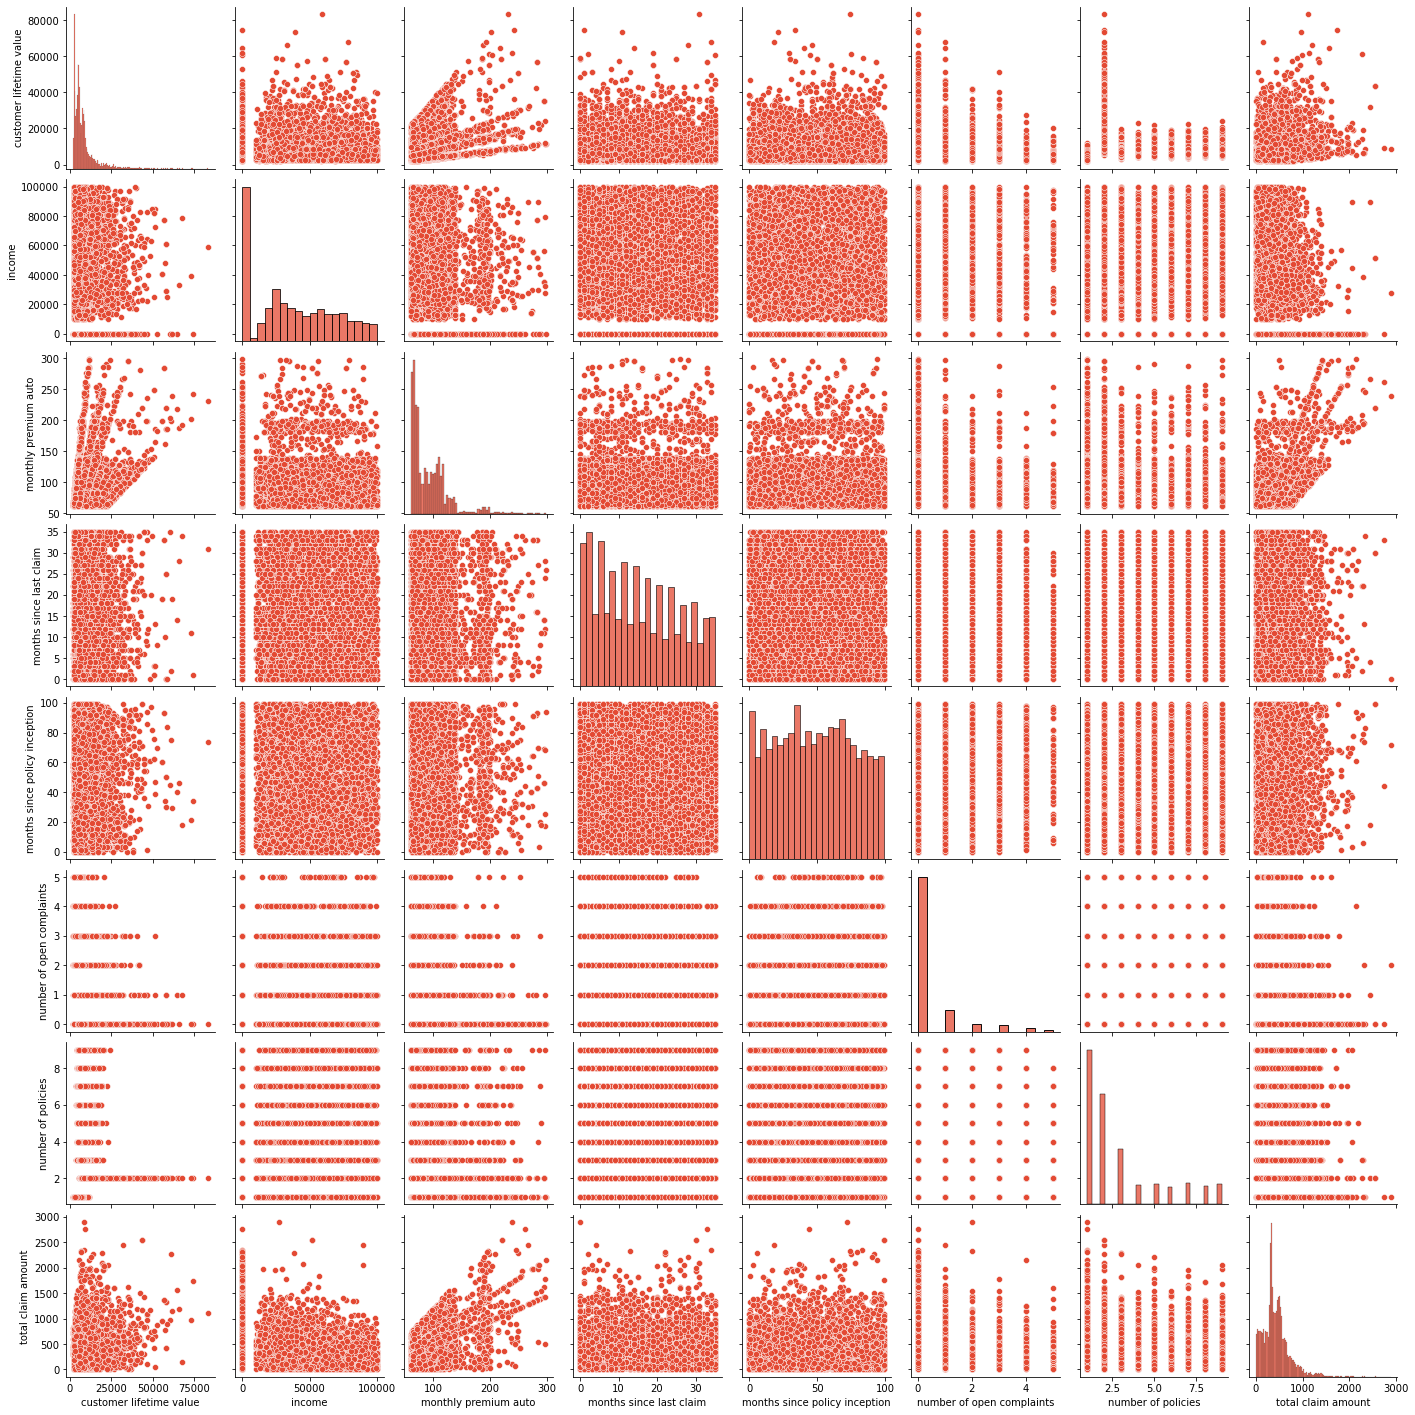

In [1035]:
sns.pairplot(numerical)

#### Construct histograms

array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly premium auto'}>],
       [<AxesSubplot:title={'center':'months since last claim'}>,
        <AxesSubplot:title={'center':'months since policy inception'}>,
        <AxesSubplot:title={'center':'number of open complaints'}>],
       [<AxesSubplot:title={'center':'number of policies'}>,
        <AxesSubplot:title={'center':'total claim amount'}>,
        <AxesSubplot:>]], dtype=object)

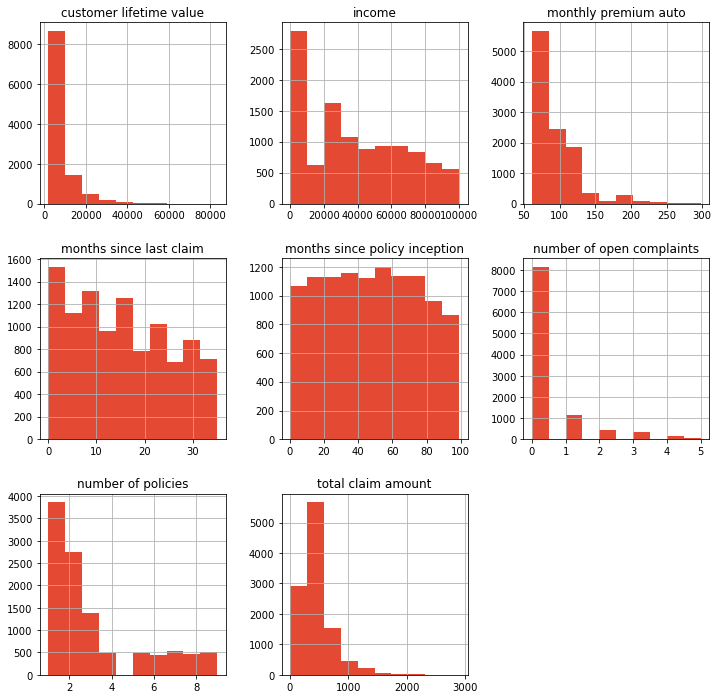

In [1036]:
numerical.hist(figsize=(12,12))

#### Check the multicollinearity

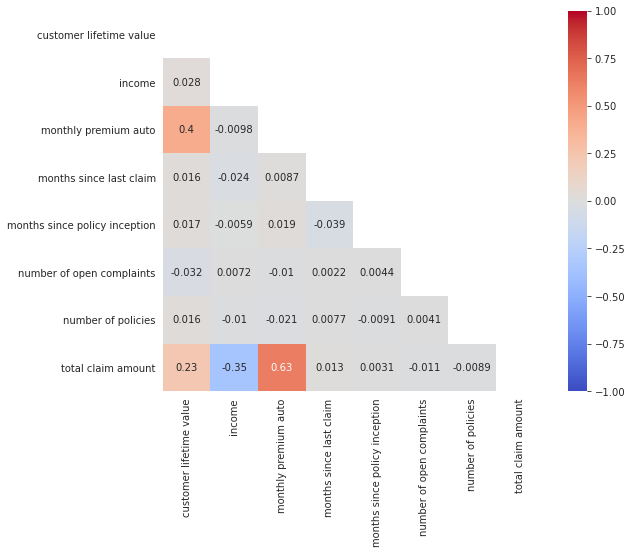

In [1037]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

#### Drop highly correlated features

In [1038]:
corr_matrix=numerical.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

[]

#### Response rate

In [1040]:
response_rate = mark_df['response'].value_counts()
response_rate

No     8813
Yes    1466
Name: response, dtype: int64

<BarContainer object of 2 artists>

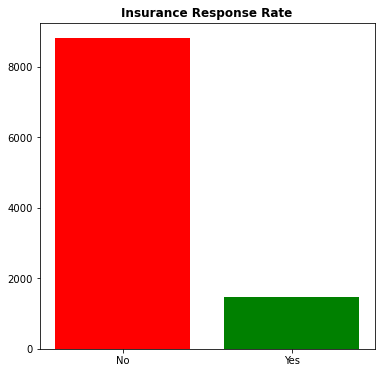

In [1041]:
# create figure and axes
fig3, ax3 = plt.subplots(figsize = (6,6))

# set title
ax3.set_title('Insurance Response Rate', fontweight='bold')

# plot the bar chart
ax3.bar(response_rate.index, response_rate, color=('red','green'))

#### Response rate by channel 

In [1042]:
sales_channel_response_rate = mark_df.groupby(['sales channel'])['response'].count().reset_index()
sales_channel_response_rate

,sales channel,response
0,Agent,3890
1,Branch,2865
2,Call Center,2013
3,Web,1511


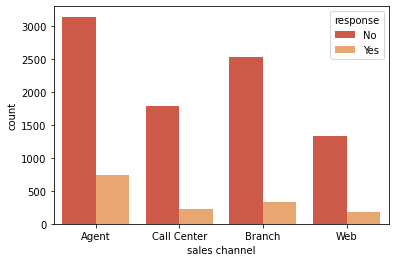

In [1043]:
response_rate_by_channel = sns.countplot(x="sales channel", hue="response", data=mark_df)

#### Response rate by claim amount

In [1044]:
claim_amount_response_rate = mark_df.groupby(['total claim amount'])['response'].count().reset_index()
claim_amount_response_rate

,total claim amount,response
0,0.099007,1
1,0.382107,2
2,0.423310,2
3,0.517753,1
4,0.769185,1
...,...,...
5101,2345.413441,1
5102,2452.894264,1
5103,2552.343856,2
5104,2759.794354,1


In [1045]:
claim_amount_bins = pd.cut(mark_df['total claim amount'], labels = ['Low', 'Moderate', 'High', 'Very High'], bins = 4)
claim_amount_bins

0             Low
1        Moderate
2             Low
3             Low
4             Low
           ...   
10905    Moderate
10906         Low
10907         Low
10908         Low
10909    Moderate
Name: total claim amount, Length: 10910, dtype: category
Categories (4, object): ['Low' < 'Moderate' < 'High' < 'Very High']

<AxesSubplot:xlabel='total claim amount', ylabel='count'>

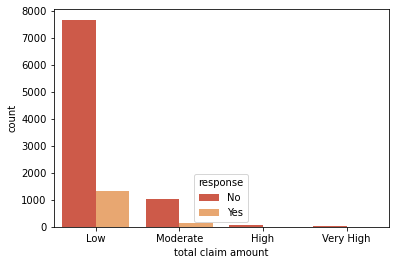

In [1046]:
response_rate_by_claim_amount= sns.countplot(x=claim_amount_bins, hue="response", data=mark_df)
response_rate_by_claim_amount

#### Response rate by income

In [1047]:
income_response_rate = mark_df.groupby(['income'])['response'].count().reset_index()
income_response_rate

,income,response
0,0,2618
1,10037,1
2,10074,1
3,10097,2
4,10105,1
...,...,...
5689,99875,1
5690,99934,1
5691,99960,1
5692,99961,1


In [1048]:
income_bins = pd.cut(mark_df['income'], labels = ['Low', 'Moderate', 'High', 'Very High'], bins = 4)
income_bins

0        Moderate
1             Low
2             Low
3        Moderate
4             Low
           ...   
10905         Low
10906        High
10907    Moderate
10908        High
10909         Low
Name: income, Length: 10910, dtype: category
Categories (4, object): ['Low' < 'Moderate' < 'High' < 'Very High']

<AxesSubplot:xlabel='income', ylabel='count'>

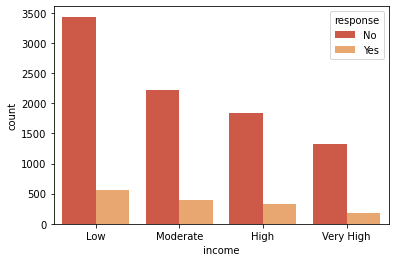

In [1049]:
response_rate_by_income= sns.countplot(x=income_bins, hue="response", data=mark_df)
response_rate_by_income

#### Interesting findings

In [1]:
employmentstatus_response_rate = mark_df.groupby(['employmentstatus'])['response'].count().reset_index()
employmentstatus_response_rate

NameError: name 'mark_df' is not defined

In [2]:
response_rate_by_employmentstatus = sns.countplot(x="employmentstatus", hue="response", data=mark_df)

NameError: name 'sns' is not defined